#  Grippy Benchmarking Analysis

[Grippy Form](https://docs.google.com/forms/d/e/1FAIpQLSeHHFIHJOOWACWoOs7_FWou_mAI1fK03YU93pizUeHE-c7t3A/viewform)

Based on the data submitted by 103 climbers invited to take part in the Grippy benchmarking exercise. This first round of research project seeks to explore the data collected and establish whether the data collected can be used to evaluate the climbers ability.

Writen by David Coxon Created 18th May 2020 Last Updated 18th May 2020

### Notes on Data File

The original Data from the google form can be found in file ds1_anon.csv this data has had all names and contact details removed so that it is anonymous in terms od GDPR. The first row contains the column names in the forms of the full form question. 

The file grippy_ds1_anon.csv contains a version of the data as a csv file which has been pre-processed in excel, the original column titles have been shorted to make them more friendly as column headers. An additional column has been added to classify the climbers as Intermediate, Advanced or Pro this is determined by which size of edge they performed the testing on 14mm or 16mm.

The response "Equal Sport and Bouldering" under 'Primary_Activity' was simplified to 'Both'.

In the Original Data the 4 columns relating to Sports Grades and the 4 Columns relating to Bouldering Grades for Climbers that selected 'Equal Sport and Bouldering' were duplicated with 8 columns of their own. These were moved to the corresponding Sports and Bouldering columns and the empty columns removed. 

The Pull-up and Leg raise data from all 3 levels of climbers were consolidated into 2 columns.
The Right and Left Lock off data from Advanced and pro were consolidated into 2 columns.
The Single leg front lever data rom Advanced and pro were consolidated into a single column.

In [12]:
# Get file Names
!cd data; ls

ds1_anon.csv        grippy_ds1_anon.csv


## Import Packages

In [48]:
### import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab

## Import Data

In [41]:
# import Benchmarking Data from csv
file="Data/grippy_ds1_anon.csv"
Benchmark_df=pd.read_csv(file, encoding = "ISO-8859-1")

# print a few sample lines of data
print(Benchmark_df.head())

   Gender  Age  Weight         Level  Edge Primary_Activity  \
0    Male   31    65.0  Intermediate  16.0             Both   
1  Female   27    57.0  Intermediate   NaN             Both   
2  Female   21    62.0  Intermediate   NaN             Both   
3    Male   23    95.0  Intermediate   NaN             Both   
4    Male   27    75.0  Intermediate   NaN             Both   

   Sports Grade Redpoint Multi-session  Sports Grade Redpoint Single-session  \
0                                 19.0                                  18.0   
1                                 17.0                                  16.0   
2                                 16.0                                  17.0   
3                                 14.0                                  12.0   
4                                 14.0                                  14.0   

   Sports Grade Flashed  Sports Grade Flashed Consistently  ...  \
0                  19.0                               18.0  ...   
1     

## Columns

In [42]:
# number of columns
print("\n There are " + str(len(Benchmark_df.columns)) + " Columns." )

# print column headers
print("\n Benchmark Columns: \n")
print(Benchmark_df.columns.values)


 There are 26 Columns.

 Benchmark Columns: 

['Gender' 'Age' 'Weight' 'Level' 'Edge' 'Primary_Activity'
 'Sports Grade Redpoint Multi-session'
 'Sports Grade Redpoint Single-session' 'Sports Grade Flashed'
 'Sports Grade Flashed Consistently'
 'Boulder Grade Redpoint Multi-session'
 'Boulder Grade Redpoint Single-session' 'Boulder Grade Flashed'
 'Boulder Grade Boulder Flashed Consistently' 'Pull-ups' 'Pull-ups Right'
 'Pull-ups Left' 'Leg-raises' '16mm Hang 4_finger' '14mm Hang 4_finger'
 '14mm edge - Front3' '14mm edge - Back3' 'Right Arm Lock_off'
 'Left Arm Lock_off' 'Front Lever Single' 'Front Lever']


In [47]:
# Get a statistical overview of the data

print("\n Benchmark Overview: \n ")
Benchmark_df.describe()


 Benchmark Overview: 
 


,Age,Weight,Edge,Sports Grade Redpoint Multi-session,Sports Grade Redpoint Single-session,Sports Grade Flashed,Sports Grade Flashed Consistently,Boulder Grade Redpoint Multi-session,Boulder Grade Redpoint Single-session,Boulder Grade Flashed,...,Pull-ups Left,Leg-raises,16mm Hang 4_finger,14mm Hang 4_finger,14mm edge - Front3,14mm edge - Back3,Right Arm Lock_off,Left Arm Lock_off,Front Lever Single,Front Lever
count,103.000000,103.000000,1.0,57.000000,57.000000,57.000000,57.000000,75.000000,75.000000,75.000000,...,3.0,100.000000,65.000000,35.000000,3.000000,3.0,38.000000,38.000000,38.000000,3.000000
mean,31.805825,74.072816,16.0,17.596491,16.666667,16.157895,15.157895,18.986667,18.066667,17.800000,...,2.0,15.660000,15.784615,23.614286,30.333333,26.0,9.184211,6.947368,10.263158,10.333333
std,9.257809,15.383536,NaN,2.846424,2.753785,2.651074,2.724161,3.142960,3.713865,2.775374,...,1.0,9.588735,13.833262,17.554154,0.577350,4.0,9.717233,6.742152,8.698196,2.081666
min,17.000000,46.000000,16.0,12.000000,10.000000,10.000000,10.000000,11.000000,10.000000,11.000000,...,1.0,0.000000,0.000000,2.000000,30.000000,22.0,0.000000,0.000000,0.000000,8.000000
25%,25.000000,66.000000,16.0,15.000000,15.000000,14.000000,13.000000,17.000000,16.000000,16.000000,...,1.5,10.000000,6.000000,10.500000,30.000000,24.0,3.000000,2.000000,5.000000,9.500000
50%,30.000000,73.000000,16.0,18.000000,17.000000,16.000000,15.000000,19.000000,18.000000,18.000000,...,2.0,15.000000,12.000000,20.500000,30.000000,26.0,6.500000,5.500000,7.000000,11.000000
75%,36.000000,80.000000,16.0,19.000000,18.000000,18.000000,18.000000,21.000000,20.000000,20.000000,...,2.5,21.000000,22.000000,30.000000,30.500000,28.0,12.000000,8.750000,14.000000,11.500000
max,69.000000,185.000000,16.0,26.000000,26.000000,22.000000,21.000000,26.000000,27.000000,24.000000,...,3.0,50.000000,60.000000,90.000000,31.000000,30.0,51.000000,30.000000,35.000000,12.000000


## General Overview of Participants

103 climbers took part in the project.

The average age (mean) of climbers taking part was 31 with climbers aged aged between 17 and 69 being benchmarked.

The average weight of climbers was 74kg with individual weights reported ranging from 46 to 185kg. (Note its doubtful that a climber weights 185kg this is most likely an error)

Sports Grades ranged from 10 to 26 using the IRCA reporting scale with an average Redpoint of 17 (mean). Boulder grades ranged from 10 to 27 on the IRCA reporting scale with an average redpoint of 18 (mean).

## Create Subsets

In [71]:
# subset Gender

Benchmark_male_df=(Benchmark_df[Benchmark_df['Gender']=="Male"])
Benchmark_female_df=(Benchmark_df[Benchmark_df['Gender']=="Female"])

## Visualisation of Participant Profiles

## Participant Age by Gender

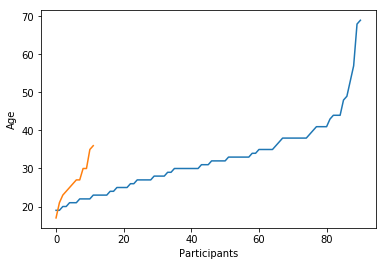

In [76]:
# sort by age and Gender
AgeSorted=Benchmark_df.sort_values(['Age'], ascending=[True])
MaleAgeSorted=Benchmark_male_df.sort_values(['Age'], ascending=[True])
FemaleAgeSorted=Benchmark_female_df.sort_values(['Age'], ascending=[True])
# create series for y axis based on number of Participants
y = (AgeSorted)['Age']
y1=(MaleAgeSorted)['Age']
y2=(FemaleAgeSorted)['Age']
N = len(AgeSorted)
N1=len(MaleAgeSorted)
N2=len(FemaleAgeSorted)
x = range(N)
x1= range(N1)
x2= range(N2)

# plot Pafticipant Age
# plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlabel("Participants")
plt.ylabel("Age")
# print plots
#pylab.savefig('Graphs/salesdistribution.png')   # save the figure to file
#pylab.savefig('Graphs/salesdistribution.pdf') # savefig('salesdistribution.pdf')
plt.show()

### Observation on Gender and Age

Under 12 percent of the climbers benchmarked were female. The age range of female climbers being benchmarked was between 17 and 36, the age range of male climbers being benchmarked was noteably higher from 19 to 69. This is consistent with numbers of climbers in the wider community. Traditionally climbing was very male dominated sport and while this is starting to change, people coming into climbing tend to do so at a younger age so the majority of female climbers are of a younger age group.    

## Boulder Grade by Gender

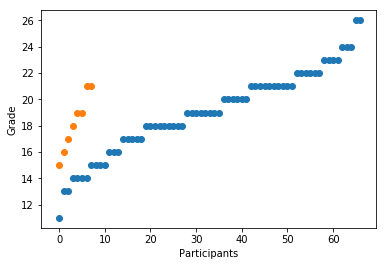

In [85]:
# sort by age and Gender
GradeSorted=Benchmark_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
MaleGradeSorted=Benchmark_male_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
FemaleGradeSorted=Benchmark_female_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
# create series for y axis based on number of Participants
y = (GradeSorted)['Boulder Grade Redpoint Multi-session']
y1=(MaleGradeSorted)['Boulder Grade Redpoint Multi-session']
y2=(FemaleGradeSorted)['Boulder Grade Redpoint Multi-session']
N = len(GradeSorted)
N1=len(MaleGradeSorted)
N2=len(FemaleGradeSorted)
x = range(N)
x1= range(N1)
x2= range(N2)

# plot Pafticipant Age
# plt.plot(x,y)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlabel("Participants")
plt.ylabel("Grade")
# print plots
#pylab.savefig('Graphs/salesdistribution.png')   # save the figure to file
#pylab.savefig('Graphs/salesdistribution.pdf') # savefig('salesdistribution.pdf')
plt.show()

### Observation on Grade and Gender
The age range of grades on the IRCA reporting scale range from 11 to 26, this would be considered to include from beginner to elite. Within the female climbers benchmarked the range went from 15 to 21 which would be considered to go from intermediate to advanced.

## Boulder Grade by Age

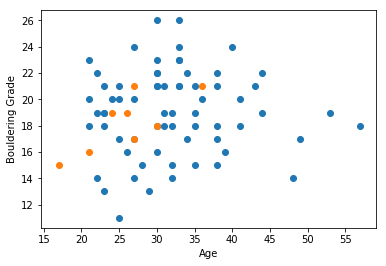

In [87]:
# sort by age and Gender
GradeSorted=Benchmark_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
MaleGradeSorted=Benchmark_male_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
FemaleGradeSorted=Benchmark_female_df.sort_values(['Boulder Grade Redpoint Multi-session'], ascending=[True])
# create series for y axis based on number of Participants
y = (GradeSorted)['Boulder Grade Redpoint Multi-session']
y1=(MaleGradeSorted)['Boulder Grade Redpoint Multi-session']
y2=(FemaleGradeSorted)['Boulder Grade Redpoint Multi-session']
N = len(GradeSorted)
N1=len(MaleGradeSorted)
N2=len(FemaleGradeSorted)
x = range(N)
x1= (MaleGradeSorted)['Age']
x2= (FemaleGradeSorted)['Age']

# plot Pafticipant Age
# plt.plot(x,y)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlabel("Age")
plt.ylabel("Bouldering Grade")
# print plots
#pylab.savefig('Graphs/salesdistribution.png')   # save the figure to file
#pylab.savefig('Graphs/salesdistribution.pdf') # savefig('salesdistribution.pdf')
plt.show()

### Observation on Grade and Age
The distribution of boulder grade by both age and gender is quite even implying that there is no linear relationship between grade and either age or gener. 

## Sports Grade by Age

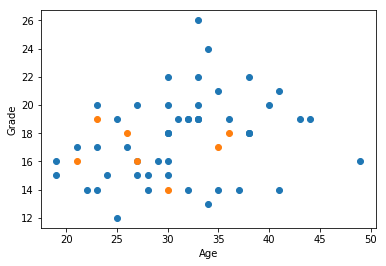

In [86]:
# sort by Sports Grade and Gender
SportsGradeSorted=Benchmark_df.sort_values(['Sports Grade Redpoint Multi-session'], ascending=[True])
MaleSportsGradeSorted=Benchmark_male_df.sort_values(['Sports Grade Redpoint Multi-session'], ascending=[True])
FemaleSportsGradeSorted=Benchmark_female_df.sort_values(['Sports Grade Redpoint Multi-session'], ascending=[True])
# create series for y axis based on number of Participants
y = (SportsGradeSorted)['Sports Grade Redpoint Multi-session']
y1=(MaleGradeSorted)['Sports Grade Redpoint Multi-session']
y2=(FemaleGradeSorted)['Sports Grade Redpoint Multi-session']
N = len(SportsGradeSorted)
N1=len(MaleSportsGradeSorted)
N2=len(FemaleSportsGradeSorted)
x = range(N)
x1= (MaleSportsGradeSorted)['Age']
x2= (FemaleSportsGradeSorted)['Age']

# plot Pafticipant Age
# plt.plot(x,y)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlabel("Age")
plt.ylabel("Sports Grade")
# print plots
#pylab.savefig('Graphs/salesdistribution.png')   # save the figure to file
#pylab.savefig('Graphs/salesdistribution.pdf') # savefig('salesdistribution.pdf')
plt.show()

### Observation on Sports Grade and Age
The distribution of Sports grade by both age and gender is different to the distribution of bouldering grades but is also quite even. Grades generally appear to be a little lower than the boulder grades 